# Benchmark of NARMA using ESN

This is some examples of NARMA using ESN. Grid-search is performed.

Installed required modules in Azure. Note that Oger install file must be uploaded to AZURE manually before running these commands.

(For some reason as of 24.08.2017 Azure no longer accepts the "!pip install Oger-1.2.tar.gz". This is probably due to some update.)

If NOT running in Azure ignore this step!

In [ ]:
!pip install mdp
!pip install Oger-1.2.tar.gz

In [1]:
import Oger
import mdp
from matplotlib import pyplot as plt
import numpy as np

/home/tilemachos/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tilemachos/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/tilemachos/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be remove

# Get the data set

Change manual narma10 or narma30

For grid-search set n_samples=9

For testing set n_samples=10

In [21]:
# Get the dataset
[x, y] = Oger.datasets.narma10(n_samples=10, sample_len=10000)

# Set the parameters

In [3]:
washable = True # washout of 200 steps gives better performance
input_scaling = 0.1 # best parameter for most models found through grid-search
bias_scaling = 0.0 # best parameter for most models found through grid-search
number_of_neurons = 100 # for the test run and the grid-search
number_of_neurons_list = [100, 200, 300] # for the evaluation
number_of_runs = 10 # number of random runs per model

# Example run of NARMA

In [22]:
# construct individual nodes
#reservoir = Oger.nodes.ReservoirNode(output_dim=100, input_scaling=0.5)
reservoir = Oger.nodes.SparseAndOrthogonalMatricesReservoir(input_dim=1, output_dim=number_of_neurons, input_scaling=input_scaling, bias_scaling=bias_scaling)
readout = Oger.nodes.RidgeRegressionNode(verbose=True, plot_errors=True, other_error_measure = Oger.utils.nmse)

In [23]:
# build network with MDP framework
flow = mdp.Flow([reservoir, readout], verbose=1)
Oger.utils.make_inspectable(Oger.nodes.ReservoirNode)
if washable:
    Oger.utils.enable_washout(Oger.nodes.RidgeRegressionNode, 200)

Class ReservoirNode is already inspectable.


Training node #0 (SparseAndOrthogonalMatricesReservoir)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
100% [0:00:02] - [0:00:00]
Total time: 2.2563419342 s
Found a ridge_param(s) = [6.3095734448014265e-06] with a validation error(s) of: [0.12414431887759801]


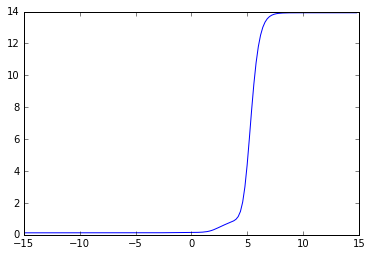

In [24]:
data = [[], zip(x[0:-1], y[0:-1])]

# train the flow 
flow.train(data)

In [25]:
#apply the trained flow to the training data and test data
trainout = flow(x[0])
testout = flow(x[-1])

# print errors for all narma time serie
print "===== Full time serie error ====="
print "NRMSE: " + str(Oger.utils.nrmse(y[-1], testout))
print "NMSE: " + str(Oger.utils.nmse(y[-1], testout))
print "MSE: " + str(Oger.utils.mse(y[-1], testout))

# print errors for first 500 steps
print "===== first 500 steps error ====="
print "NRMSE: " + str(Oger.utils.nrmse(y[-1][:500], testout[:500]))
print "NMSE: " + str(Oger.utils.nmse(y[-1][:500], testout[:500]))
print "MSE: " + str(Oger.utils.mse(y[-1][:500], testout[:500]))

# print errors for first 500 steps after 200 steps
print "===== 200-700 steps error ====="
print "NRMSE: " + str(Oger.utils.nrmse(y[-1][200:700], testout[200:700]))
print "NMSE: " + str(Oger.utils.nmse(y[-1][200:700], testout[200:700]))
print "MSE: " + str(Oger.utils.mse(y[-1][200:700], testout[200:700]))

===== Full time serie error =====
NRMSE: 0.374539249873
NMSE: 0.140293679063
MSE: 0.00147214066567
===== first 500 steps error =====
NRMSE: 0.369070545575
NMSE: 0.136486039691
MSE: 0.00167723543708
===== 200-700 steps error =====
NRMSE: 0.316719844496
NMSE: 0.100512484867
MSE: 0.00111383315822


Check errors only in the first 500 steps

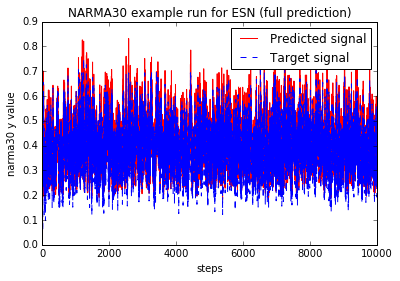

In [26]:
# plot the full predicition
plt.figure()
plt.plot(y[-1], 'r', ls='-')
plt.plot(testout, 'b', ls='--')
plt.legend(['Predicted signal', 'Target signal'])
plt.title('NARMA30 example run for ESN (full prediction)')
plt.xlabel('steps')
plt.ylabel('narma30 y value')
plt.show()

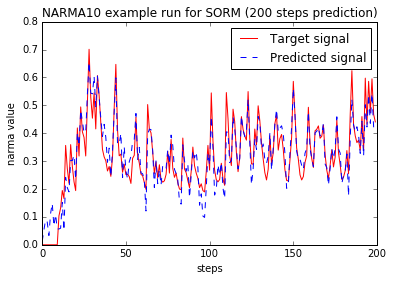

In [27]:
# plot the first 200 steps
plt.figure()
plt.plot(y[-1][:200], 'r', ls='-')
plt.plot(testout[:200], 'b', ls='--')
plt.legend(['Target signal', 'Predicted signal'], loc='best')
plt.title('NARMA10 example run for SORM (200 steps prediction)')
plt.xlabel('steps')
plt.ylabel('narma value')
plt.savefig('NARMA10_SORM_example.png')
plt.show()

# Set the dictionaries required for mass-testing / grid-searching

In [7]:
string_names_dict_short = {
    0: 'ESN',
    1: 'DLR',
    2: 'DLRB',
    3: 'SCR',
    4: 'CRJ',
    5: 'FF-ESN',
    6: 'SORM',
    7: 'CyclicSORM'
}

string_names_dict_full = {
    0: 'original ESN',
    1: 'DelayLineReservoir',
    2: 'DelayLineReservoirWithFeedback',
    3: 'SimpleCycleReservoir',
    4: 'CycleReservoirWithJumps',
    5: 'FeedForwardESN',
    6: 'SparseAndOrthogonalMatrices',
    7: 'CyclicSparseAndOrthogonalMatrices'
}

nodes_dict = {
    0: Oger.nodes.ReservoirNode,
    1: Oger.nodes.DelayLineReservoirNode,
    2: Oger.nodes.DelayLineWithFeedbackReservoirNode,
    3: Oger.nodes.SimpleCycleReservoirNode,
    4: Oger.nodes.CycleReservoirWithJumpsNode,
    5: Oger.nodes.FeedForwardESNReservoir,
    6: Oger.nodes.SparseAndOrthogonalMatricesReservoir,
    7: Oger.nodes.CyclicSORMsReservoir
}

# Gridsearch for input and bias scaling (separate reservoirs)

In [13]:
data = [[], zip(x[0:-1], y[0:-1])]

#Oger.utils.make_inspectable(Oger.nodes.ReservoirNode)
if washable:
    Oger.utils.enable_washout(Oger.nodes.RidgeRegressionNode, 200)

# set the range of input and bias scaling
input_scaling_range = np.arange(0.1, 1.1, 0.1)
bias_scaling_range = np.arange(0.0, 1.0, 0.1)

count = 0
max_count = input_scaling_range.shape[0] * bias_scaling_range.shape[0] * len(nodes_dict.keys())
    

# grid-search for every model:
for key, reservoir_node in mdp.utils.progressinfo(nodes_dict.iteritems(), style='timer', 
                                                               length=len(nodes_dict.keys())):
    
    errors_mnse = np.zeros([input_scaling_range.shape[0], bias_scaling_range.shape[0]])
    errors_mse = np.zeros([input_scaling_range.shape[0], bias_scaling_range.shape[0]])
    
    for i, input_scaling in enumerate(input_scaling_range):
        for j, bias_scaling in enumerate(bias_scaling_range):
            # construct individual nodes
            reservoir = reservoir_node(input_dim=1, output_dim=number_of_neurons, input_scaling=input_scaling, 
                                                  bias_scaling=bias_scaling)
            readout = Oger.nodes.RidgeRegressionNode(verbose=False, plot_errors=False, 
                                                     other_error_measure = Oger.utils.nmse)

            # build network with MDP framework
            flow = mdp.Flow([reservoir, readout], verbose=0)

            # train the flow 
            flow.train(data)

            #apply the trained flow to the training data and test data
            testout = flow(x[-1])

            errors_mnse[i, j] = Oger.utils.nmse(y[-1], testout)
            errors_mse[i, j] = Oger.utils.mse(y[-1], testout)

            count += 1
            print "Progress: ", str(float(count) / max_count)
            
    # save the results for later processing
    np.savetxt('NMSE_' + string_names_dict_short[key] + '.txt', errors_mnse, delimiter=',')
    np.savetxt('MSE_' + string_names_dict_short[key] + '.txt', errors_mse, delimiter=',')


  0% ? - ?Progress:  0.00125
Progress:  0.0025
Progress:  0.00375
Progress:  0.005
Progress:  0.00625
Progress:  0.0075
Progress:  0.00875
Progress:  0.01
Progress:  0.01125
Progress:  0.0125
Progress:  0.01375
Progress:  0.015
Progress:  0.01625
Progress:  0.0175
Progress:  0.01875
Progress:  0.02
Progress:  0.02125
Progress:  0.0225
Progress:  0.02375
Progress:  0.025
Progress:  0.02625
Progress:  0.0275
Progress:  0.02875
Progress:  0.03
Progress:  0.03125
Progress:  0.0325
Progress:  0.03375
Progress:  0.035
Progress:  0.03625
Progress:  0.0375
Progress:  0.03875
Progress:  0.04
Progress:  0.04125
Progress:  0.0425
Progress:  0.04375
Progress:  0.045
Progress:  0.04625
Progress:  0.0475
Progress:  0.04875
Progress:  0.05
Progress:  0.05125
Progress:  0.0525
Progress:  0.05375
Progress:  0.055
Progress:  0.05625
Progress:  0.0575
Progress:  0.05875
Progress:  0.06
Progress:  0.06125
Progress:  0.0625
Progress:  0.06375
Progress:  0.065
Progress:  0.06625
Progress:  0.0675
Progress: 

# Gridsearch for input and bias scaling (same reservoir)

In [8]:
data = [[], zip(x[0:-1], y[0:-1])]

#Oger.utils.make_inspectable(Oger.nodes.ReservoirNode)
if washable:
    Oger.utils.enable_washout(Oger.nodes.RidgeRegressionNode, 200)

# set the range of input and bias scaling
input_scaling_range = np.arange(0.1, 1.1, 0.1)
bias_scaling_range = np.arange(0.0, 1.0, 0.1)

count = 0
max_count = input_scaling_range.shape[0] * bias_scaling_range.shape[0] * len(nodes_dict.keys())
    

# grid-search for every model:
for key, reservoir_node in mdp.utils.progressinfo(nodes_dict.iteritems(), style='timer', 
                                                               length=len(nodes_dict.keys())):
    
    errors_mnse = np.zeros([input_scaling_range.shape[0], bias_scaling_range.shape[0]])
    errors_mse = np.zeros([input_scaling_range.shape[0], bias_scaling_range.shape[0]])
    
    # get the initial arrays to use
    reservoir_temp = reservoir_node(input_dim=1, output_dim=number_of_neurons, \
                                input_scaling=1, bias_scaling=1)
    w_in = reservoir_temp.w_in
    w_bias = reservoir_temp.w_bias
    w = reservoir_temp.w
    
    for i, input_scaling in enumerate(input_scaling_range):
        for j, bias_scaling in enumerate(bias_scaling_range):
            # construct individual nodes
            reservoir = reservoir_node(input_dim=1, output_dim=number_of_neurons, 
                                      w=w, w_in=w_in*input_scaling, w_bias=w_bias*bias_scaling)
            
            readout = Oger.nodes.RidgeRegressionNode(verbose=False, plot_errors=False, 
                                                     other_error_measure = Oger.utils.nmse)

            # build network with MDP framework
            flow = mdp.Flow([reservoir, readout], verbose=0)

            # train the flow 
            flow.train(data)

            #apply the trained flow to the training data and test data
            testout = flow(x[-1])

            errors_mnse[i, j] = Oger.utils.nmse(y[-1], testout)
            errors_mse[i, j] = Oger.utils.mse(y[-1], testout)

            count += 1
            print "Progress: ", str(float(count) / max_count)
            
    # save the results for later processing
    np.savetxt('NMSE_' + string_names_dict_short[key] + '.txt', errors_mnse, delimiter=',')
    np.savetxt('MSE_' + string_names_dict_short[key] + '.txt', errors_mse, delimiter=',')

  0% ? - ?Progress:  0.00125
Progress:  0.0025
Progress:  0.00375
Progress:  0.005
Progress:  0.00625
Progress:  0.0075
Progress:  0.00875
Progress:  0.01
Progress:  0.01125
Progress:  0.0125
Progress:  0.01375
Progress:  0.015
Progress:  0.01625
Progress:  0.0175
Progress:  0.01875
Progress:  0.02
Progress:  0.02125
Progress:  0.0225
Progress:  0.02375
Progress:  0.025
Progress:  0.02625
Progress:  0.0275
Progress:  0.02875
Progress:  0.03
Progress:  0.03125
Progress:  0.0325
Progress:  0.03375
Progress:  0.035
Progress:  0.03625
Progress:  0.0375
Progress:  0.03875
Progress:  0.04
Progress:  0.04125
Progress:  0.0425
Progress:  0.04375
Progress:  0.045
Progress:  0.04625
Progress:  0.0475
Progress:  0.04875
Progress:  0.05
Progress:  0.05125
Progress:  0.0525
Progress:  0.05375
Progress:  0.055
Progress:  0.05625
Progress:  0.0575
Progress:  0.05875
Progress:  0.06
Progress:  0.06125
Progress:  0.0625
Progress:  0.06375
Progress:  0.065
Progress:  0.06625
Progress:  0.0675
Progress: 

# Run the benchmark for the models

In [5]:
data = [[], zip(x[0:-1], y[0:-1])]

narma_nmse = np.zeros([len(number_of_neurons_list), len(nodes_dict), number_of_runs])
narma_mse = np.zeros([len(number_of_neurons_list), len(nodes_dict), number_of_runs])

count = 0
max_count = narma_nmse.shape[0] * narma_nmse.shape[1] * narma_nmse.shape[2]

mdp.utils.progressinfo(enumerate(number_of_neurons_list), style='timer', length=len(number_of_neurons_list))

# run the test for every reservoir
for i, reservoir_size in mdp.utils.progressinfo(enumerate(number_of_neurons_list), style='timer', length=len(number_of_neurons_list)):
    for key, reservoir_node in nodes_dict.iteritems():
        for j in range(number_of_runs):
            # construct individual nodes
            reservoir = reservoir_node(input_dim=1, output_dim=reservoir_size, input_scaling=input_scaling, bias_scaling=bias_scaling)
            readout = Oger.nodes.RidgeRegressionNode(verbose=False, plot_errors=False, other_error_measure = Oger.utils.nmse)

            # build network with MDP framework
            flow = mdp.Flow([reservoir, readout], verbose=0)

            # train the flow 
            flow.train(data)

            #apply the trained flow to the training data and test data
            testout = flow(x[-1])

            narma_nmse[i, key, j] = Oger.utils.nmse(y[-1], testout)
            narma_mse[i, key, j] = Oger.utils.mse(y[-1], testout)
            
            count += 1
            print "Progress: ", str(float(count) / max_count)
            
# save the errors for later processing
np.save("NARMA30_nmse", narma_nmse)
np.save("NARMA30_mse", narma_mse)

  0% ? - ?Progress:  0.00416666666667
Progress:  0.00833333333333
Progress:  0.0125
Progress:  0.0166666666667
Progress:  0.0208333333333
Progress:  0.025
Progress:  0.0291666666667
Progress:  0.0333333333333
Progress:  0.0375
Progress:  0.0416666666667
Progress:  0.0458333333333
Progress:  0.05
Progress:  0.0541666666667
Progress:  0.0583333333333
Progress:  0.0625
Progress:  0.0666666666667
Progress:  0.0708333333333
Progress:  0.075
Progress:  0.0791666666667
Progress:  0.0833333333333
Progress:  0.0875
Progress:  0.0916666666667
Progress:  0.0958333333333
Progress:  0.1
Progress:  0.104166666667
Progress:  0.108333333333
Progress:  0.1125
Progress:  0.116666666667
Progress:  0.120833333333
Progress:  0.125
Progress:  0.129166666667
Progress:  0.133333333333
Progress:  0.1375
Progress:  0.141666666667
Progress:  0.145833333333
Progress:  0.15
Progress:  0.154166666667
Progress:  0.158333333333
Progress:  0.1625
Progress:  0.166666666667
Progress:  0.170833333333
Progress:  0.175
Pro